# ML Posledni Ukol
Matyas Vondra 22.6. 2023

Kapitoly:


1.   Priprava dat
2.   Referencni jednoducha linearni regrese
3.   Elastic net regrese
4.   Rozhodovaci stromy
5.   Support Vector Regression
6.   Neuronova sit
7.   Zaver



## Priprava dat

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data =
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Workshop/Clean_Dataset.csv")

In [4]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
# vyber pouze radku business tridy
business = data.loc[data['class'] == "Business"]

In [6]:
business.shape

(93487, 12)

In [7]:
business

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
# odebrani zbytecnych sloupcu
business = business.drop('Unnamed: 0', axis=1)
business = business.drop('class', axis=1)

In [9]:
business

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,10.00,49,81585


Kontrola typu a hodnot promennych

In [10]:
business.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
duration            float64
days_left             int64
price                 int64
dtype: object

In [11]:
business.departure_time.unique()

array(['Evening', 'Night', 'Early_Morning', 'Morning', 'Afternoon',
       'Late_Night'], dtype=object)

In [12]:
business.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [13]:
business.arrival_time.unique()

array(['Evening', 'Night', 'Afternoon', 'Morning', 'Late_Night',
       'Early_Morning'], dtype=object)

In [14]:
business.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [15]:
business.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [16]:
business.airline.unique()

array(['Air_India', 'Vistara'], dtype=object)

In [17]:
business.flight.unique()

array(['AI-868', 'AI-624', 'AI-531', 'AI-839', 'AI-544', 'UK-985',
       'AI-479', 'AI-473', 'UK-871', 'UK-977', 'AI-504', 'AI-807',
       'AI-540', 'AI-537', 'UK-817', 'AI-762', 'AI-764', 'UK-707',
       'UK-809', 'UK-813', 'UK-837', 'UK-953', 'AI-887', 'AI-665',
       'AI-805', 'AI-678', 'AI-636', 'AI-441', 'AI-435', 'UK-683',
       'AI-403', 'UK-963', 'UK-955', 'AI-411', 'AI-811', 'AI-453',
       'UK-637', 'UK-927', 'AI-483', 'AI-542', 'AI-560', 'AI-406',
       'UK-829', 'UK-879', 'UK-899', 'UK-627', 'UK-945', 'AI-451',
       'AI-885', 'AI-877', 'UK-995', 'UK-673', 'AI-429', 'UK-859',
       'AI-439', 'UK-839', 'UK-833', 'UK-819', 'UK-801', 'UK-815',
       'UK-706', 'AI-465', 'AI-512', 'AI-767', 'AI-401', 'UK-835',
       'UK-737', 'UK-847', 'UK-951', 'AI-475', 'AI-431', 'UK-933',
       'AI-502', 'AI-506', 'AI-803', 'UK-855', 'UK-705', 'AI-499',
       'AI-471', 'AI-485', 'AI-423', 'AI-415', 'UK-747', 'AI-481',
       'UK-981', 'UK-975', 'UK-993', 'UK-943', 'UK-941', 'UK-8

### One hot encoding promennych

In [18]:
transformed = pd.get_dummies(business)

In [19]:
transformed

,duration,days_left,price,airline_Air_India,airline_Vistara,flight_AI-401,flight_AI-402,flight_AI-403,flight_AI-406,flight_AI-407,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
206666,2.00,1,25612,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
206667,2.25,1,25612,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
206668,24.75,1,42220,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
206669,26.50,1,44450,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
206670,6.67,1,46690,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
300149,10.42,49,77105,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300150,13.83,49,79099,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
300151,10.00,49,81585,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [20]:
# Normalizace dat (nakonec nepouzita)
normalized_df =
 (transformed-transformed.min())/(transformed.max()-transformed.min())

In [21]:
normalized_df

,duration,days_left,price,airline_Air_India,airline_Vistara,flight_AI-401,flight_AI-402,flight_AI-403,flight_AI-406,flight_AI-407,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
206666,0.021390,0.0,0.122552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206667,0.026738,0.0,0.122552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
206668,0.508021,0.0,0.272078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
206669,0.545455,0.0,0.292155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
206670,0.121283,0.0,0.312323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0.194225,1.0,0.515571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300149,0.201497,1.0,0.586157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300150,0.274439,1.0,0.604109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300151,0.192513,1.0,0.626491,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Rozdeleni na train a test
from sklearn.model_selection import train_test_split
X = np.array(transformed.loc[:, transformed.columns != "price"])
y = np.array(transformed["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1)

In [23]:
X_train

array([[19.75, 19.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [12.17,  5.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [22.08, 10.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [14.92, 14.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [24.33, 48.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [26.17, 30.  ,  0.  , ...,  0.  ,  1.  ,  0.  ]])

In [27]:
X_train.shape

(74789, 326)

In [24]:
y_train

array([57405, 43729, 57992, ..., 56588, 59033, 58394])

Definice ztratove funkce. Vybral jsem si MAPE, primarne pro jeji snadnou interpretovatelnost.

In [25]:
def mape(y, yhat):
    return np.mean([np.abs(i-j)/j for i,j in zip(yhat, y)])

## Referencni jednoducha linearni regrese

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [28]:
linear_regression.score(X_test, y_test) # out of sample index determinace

-330096676127365.44

In [29]:
yhat = linear_regression.predict(X_test)

In [30]:
# mape
mape(y_test, yhat)

58122.98456233965

Dle ocekavani mela uplne nejjednodussi linearni regrese priserne vysledky :D

## Elastic net regrese
Elastic net jsem se rozhodl pouzit jelikoz data neznam tak dobre, abych mohl urcit, zda je lepsi L1 nebo L2 regularizace. Jelikoz je vysoky pocet promennych, ocekavam multikolinearitu.

In [31]:
from sklearn.linear_model import ElasticNet

In [32]:
# zakladni model
el = ElasticNet(alpha=1.0, l1_ratio=0.5)

el.fit(X_train, y_train)

mape(y_test, el.predict(X_test))

0.19153055967999336

Uz tenhle vysledek je za me velmi dobry. Prumerna out-of-sample absolutni chyba pod 20% je slusna :D

In [33]:
# hledani optimalni lambdy/alphy
lambdas = list()
for i in range(1000, 10_000, 100):
    res = ElasticNet(alpha = i/10_000 , l1_ratio=0.95) # 0.95 doplneno zpetne
    res.fit(X_train, y_train)
    lambdas.append(mape(y_train, res.predict(X_train))) # insample mape

In [34]:
# hledani optimalniho parametru pro volbu L1/L2 regularizace
l1_wts = list()
for i in range(1000, 10_000, 100):
    res = ElasticNet(alpha = 0.1, l1_ratio = i/10000)
    res.fit(X_train, y_train)
    l1_wts.append(mape(y_train, res.predict(X_train)))

In [35]:
import matplotlib.pyplot as plt

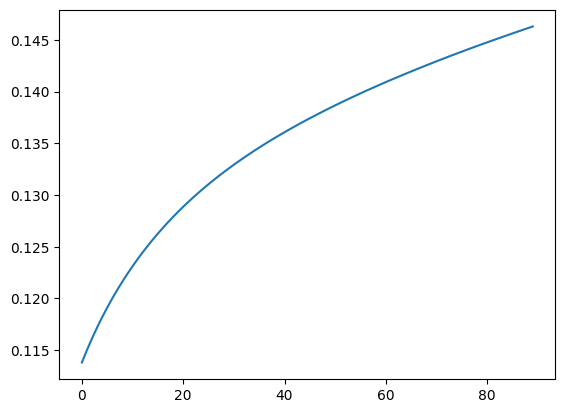

In [36]:
plt.plot(range(90), lambdas)
# zda se ze lambda bude velmi mala, asi 0,1

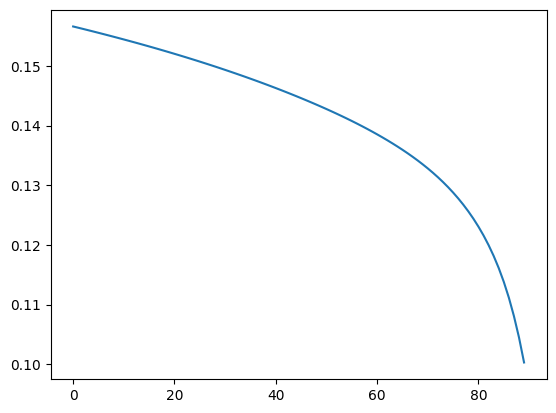

In [37]:
plt.plot(range(90), l1_wts)
# zda se ze vhodnejsi je lasso regrese (vyssi hodnota lambda)

Nakonec se jako vhodny model jevi linearni regrese s L1 regularizaci (Lasso), ktera je schopna vynechavat nektere parametry. Hodnota alpha/lambda vychazi optimalne jako pomerne nizka, tedy nedochazi k tak velke penalizaci. MAPE vychazi ~11%, coz je podle me velmi dobre

In [38]:
el = ElasticNet(alpha=0.1, l1_ratio=0.95)

el.fit(X_train, y_train)

mape(y_test, el.predict(X_test))

0.1133152803325097

## Rozhodovaci stromy

### Zakladni regresni strom
Pouzit Randomized Search (podobny jako grid, ale netestuje vsechny kombinace, jen nahodny vyber)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dtr = DecisionTreeRegressor()

In [41]:
random_grid = {
    "ccp_alpha": np.linspace(0.0001, 0.1, 10), # 10 ruznych ccp
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "min_samples_leaf": [1, 2, 5, 10]
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
randomizerCV = RandomizedSearchCV(estimator = dtr,
                                  param_distributions = random_grid,
                                  n_iter = 3,
                                  cv=2, verbose=2,
                                  random_state = 1)

In [44]:
randomizerCV.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ccp_alpha=0.0112, criterion=poisson, min_samples_leaf=2; total time=   1.4s
[CV] END ccp_alpha=0.0112, criterion=poisson, min_samples_leaf=2; total time=   1.4s
[CV] END ccp_alpha=0.0223, criterion=absolute_error, min_samples_leaf=5; total time= 6.7min
[CV] END ccp_alpha=0.0223, criterion=absolute_error, min_samples_leaf=5; total time= 6.5min
[CV] END ccp_alpha=0.0001, criterion=poisson, min_samples_leaf=5; total time=   0.8s
[CV] END ccp_alpha=0.0001, criterion=poisson, min_samples_leaf=5; total time=   0.8s


RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_iter=3,
                   param_distributions={'ccp_alpha': array([0.0001, 0.0112, 0.0223, 0.0334, 0.0445, 0.0556, 0.0667, 0.0778,
       0.0889, 0.1   ]),
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'min_samples_leaf': [1, 2, 5, 10]},
                   random_state=1, verbose=2)

In [45]:
# nalezeni optimalnich parametru pro nas strom
randomizerCV.best_params_

{'min_samples_leaf': 5, 'criterion': 'poisson', 'ccp_alpha': 0.0001}

In [46]:
regression_tree = DecisionTreeRegressor(min_samples_leaf = 5,
                                        criterion = 'poisson',
                                        ccp_alpha = 0.1)

In [47]:
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.1, criterion='poisson', min_samples_leaf=5)

In [48]:
# velmi nizka out-of-sample chyba
mape(y_test, regression_tree.predict(X_test))

0.0429253696015026

### Bagging
100 bootstrapovanych (nahodny vyber pozorovani s vracenim) regresnich stromu. Vysledna chyba vznikne zprumerovanim.

In [49]:
from sklearn.ensemble import BaggingRegressor

In [50]:
bagging = BaggingRegressor(n_estimators=100, random_state=1)

In [51]:
bagging.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=1)

In [52]:
mape(y_test, bagging.predict(X_test))

0.02806644129803859

Velmi dobry vysledek, zatim nejlepsi. Mozna byl nas puvodni strom trochu pre-uceny, coz se nam podarilo baggingem vyresit.

### Random forest
Opet 100 nahodnych stromu, vcetne nahodneho vyberu promennych. Pouzity stejne parametry jako pri klasickem stromu.

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
random_forest = RandomForestRegressor(n_estimators = 100,
                                      min_samples_leaf = 5,
                                      criterion = 'poisson',
                                      ccp_alpha = 0.1,
                                      random_state=1)

In [55]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.1, criterion='poisson', min_samples_leaf=5,
                      random_state=1)

In [56]:
mape(y_test, random_forest.predict(X_test))

0.04078963466466962

Random forest ma sice mensi chybu nez puvodni strom, ale neni tak dobry jako obycejny Bagging. Pravdepodobne by pomohlo testovat vice ruznych settingu random forestu a najit nejaky lepsi.

### Boosting
Predikce chyby predchoziho stromu. Metoda: gradient.




In [57]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [58]:
boosting = HistGradientBoostingRegressor(loss = 'poisson',
                                         max_iter = 100,
                                         min_samples_leaf = 5)

In [59]:
boosting.fit(X_train, y_train)

HistGradientBoostingRegressor(loss='poisson', min_samples_leaf=5)

In [60]:
mape(y_test, boosting.predict(X_test))

0.06874158115299706

Zde si takto "vysokou" chybu nedokazu uplne vysvetlit. Mozna zkusit upravit learning rate (default je 0.1) nebo treba L2 regularizaci, kterou model nabizi.

## Support Vector Regression
Spise pro zajimavost, nemam tolik zkusenosti s vyberem parametru pro kernely a trenink trval velmi, velmi dlouho.

Jinak pokud tomu dobre rozumim, tak SVR je vlastne celkem podobna klasicke regresi. Diky pouziti kernelu je ale mozne dobre fitovat model i na nelinearni data.

In [61]:
from sklearn.svm import SVR

In [62]:
kernels = ["linear", "poly", "rbf"]

In [63]:
for kernel in kernels:
    model = SVR(kernel = kernel)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    print(f"{kernel}: {mape(y_test, yhat): .4f}")

linear:  0.1671
poly:  0.2308
rbf:  0.2304


Jak jiz mozna bylo mozne videt drive, nase data jsou dobre rozdelitelna i linearne (dobre vysledky regularizovane linearni regrese). Tim si vysvetluji horsi skore SVR s pouzitim nelinearnich kernelu nez kernelu `linear`.

## Neuronova sit

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Neuronka s jednou skrytou vrstvou


*   Input layer = 326 neuronu
*   Hidden layer = 16 neuronu
*   Batch normalizace vstupu
*   Dropout 20% proti over fittingu
*   Output layer = 1 neuron

Vsechny aktivace RELU

Batch size 16




In [30]:
# Vytvoření a kompilace modelu
model = Sequential()
model.add(Dense(16, input_shape=(326,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam',
              metrics='mean_absolute_percentage_error')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                5232      
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,313
Trainable params: 5,281
Non-trainable params: 32
_________________________________________________________________


In [35]:
model.fit(X_train, y_train,
          epochs=20, batch_size=16,
          verbose=1)

Epoch 1/20
4675/4675 [==============================] - 14s 3ms/step - loss: 103181472.0000 - mean_absolute_percentage_error: 15.3554
Epoch 2/20
4675/4675 [==============================] - 9s 2ms/step - loss: 100858056.0000 - mean_absolute_percentage_error: 15.0977
Epoch 3/20
4675/4675 [==============================] - 11s 2ms/step - loss: 99419680.0000 - mean_absolute_percentage_error: 14.9246
Epoch 4/20
4675/4675 [==============================] - 11s 2ms/step - loss: 99728944.0000 - mean_absolute_percentage_error: 14.9564
Epoch 5/20
4675/4675 [==============================] - 10s 2ms/step - loss: 98279192.0000 - mean_absolute_percentage_error: 14.8108
Epoch 6/20
4675/4675 [==============================] - 10s 2ms/step - loss: 96285328.0000 - mean_absolute_percentage_error: 14.7581
Epoch 7/20
4675/4675 [==============================] - 10s 2ms/step - loss: 96448688.0000 - mean_absolute_percentage_error: 14.6732
Epoch 8/20
4675/4675 [==============================] - 10s 2ms/step

In [47]:
# in-sample. Je mozne, ze keras nasobi MAPE *2?
mape(y_train, model.predict(X_train))

2338/2338 [==============================] - 5s 2ms/step


0.07272346333201705

In [36]:
# out-of-sample
mape(y_test, model.predict(X_test))

585/585 [==============================] - 2s 4ms/step


0.07269192021798271

Jelikoz se data zdaji byt pomerne linearni, prvni neuronku jsem zkusil spise jednodussi, s pouze jednou skrytou vrstvou. Out-of-sample MAPE ~7 procent.

### Neuronka s dvema skrytymi vrstvami


*   Input layer = 326 neuronu
*   Hidden layer = 16 neuronu
*   Batch normalizace vstupu
*   Dropout 20%
*   Hidden layer = 24 neuronu
*   Dropout 10%
*   Output layer = 1 neuron

Vsechny aktivace RELU

Batch size 12



In [49]:
# Vytvoření a kompilace modelu
model2 = Sequential()
model2.add(Dense(16, input_shape=(326,), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(24, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='relu'))

model2.compile(loss='mean_squared_error', optimizer='adam',
               metrics='mean_absolute_percentage_error')

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                5232      
                                                                 
 batch_normalization_3 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 24)                408       
                                                                 
 dropout_6 (Dropout)         (None, 24)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                      

In [53]:
model2.fit(X_train, y_train,
          epochs=20, batch_size=12,
          verbose=1)

Epoch 1/20
6233/6233 [==============================] - 15s 2ms/step - loss: 114349656.0000 - mean_absolute_percentage_error: 16.2468
Epoch 2/20
6233/6233 [==============================] - 15s 2ms/step - loss: 113580376.0000 - mean_absolute_percentage_error: 16.2197
Epoch 3/20
6233/6233 [==============================] - 14s 2ms/step - loss: 112990576.0000 - mean_absolute_percentage_error: 16.1990
Epoch 4/20
6233/6233 [==============================] - 14s 2ms/step - loss: 111856952.0000 - mean_absolute_percentage_error: 16.1351
Epoch 5/20
6233/6233 [==============================] - 14s 2ms/step - loss: 113020008.0000 - mean_absolute_percentage_error: 16.1746
Epoch 6/20
6233/6233 [==============================] - 14s 2ms/step - loss: 112161408.0000 - mean_absolute_percentage_error: 16.1497
Epoch 7/20
6233/6233 [==============================] - 15s 2ms/step - loss: 111827616.0000 - mean_absolute_percentage_error: 16.1415
Epoch 8/20
6233/6233 [==============================] - 15s 2m

In [54]:
mape(y_test, model2.predict(X_test))

585/585 [==============================] - 1s 2ms/step


0.0732175049171604

Zkusil jsem trochu slozitejsi neuronku s pridanou druhou skrytou vrstvou. Prislo mi, ze se ztratova funkce snizovala pomalu, zkusil jsem tedy snizit velikost davky, coz prilis nepomohlo. Vysledky nejsou o moc lepsi ani horsi nez jednodussi neuronova sit.

## Zaver
Myslim, ze se ukazalo, ze ceny letenek jsou dobre predikovatelne a to i pomoci jednodussich modelu. Oproti puvodni benchmark linearni regresi performovali vsechny dalsi modely vyborne. Krome `class` jsem pouzil vsechny sloupce, vcetne kategorialnich pomoci one hot encodingu.

Jako metriku chyby jsem zvolil MAPE (Mean Absolute Percentage Error), tedy prumernou absolutni procentualni chybu. Vysledna chyba se da interpretovat jako prumerna procentualni odchylka predikce od skutecnych hodnot.

### Vyber nejlepsiho modelu
Jelikoz dobrych predikcnich schopnosti dosahovaly i jednodussi modely, myslim, ze je vhodne vybrat je. A to primarne z duvodu jejich snadne uchopitelnosti i rychlosti treninku.

Naprosto nejlepsich vysledku dosahly regresni stromy za pouziti bagging metody (bootstrap + aggregate). MAPE tohoto modelu byla pouze ~2.8%, coz je fantasticka hodnota.

I standardni regresni strom, nebo model random forest dosahl dobrych vysledku a MAPE ~4.2% a ~4%. U jednoho stromu mam podezreni na over-fitting, u random forestu si myslim, ze jsem nenalezl optimalni parametry.

Dalsim vhodnym modelem by mohla byt linearni regrese regularizovana pomoci elastic net. Pri pouziti L1 (Lasso) regularizace dosahl tento model out-of-sample chyby asi 11%, coz na linearni regresi neni vubec spatne. Hledani optimalnich parametru vsak trvalo pomerne dlouho.

Myslim, ze v pripade aktualnich dat nema vyznam vuzivat neuronove site. Ackoliv i jednoducha sit mela vcelku dobre predikcni schopnosti, neni lepsi nez rozhodovaci stromy a jeji trenink a interpretace je slozitejsi. Je mozne, ze pri nalezeni lepsich hyper-parametru, by mohla neuronka dosahnout stejne kvality predikci jako stromy. Aktivacni funkce vsech neuronu jsem vybral RELU.

K Support Vector modelum se radsi moc nevyjadruji :D Myslim, ze by melo byt mozne je zlepsit. Jejich trenovani trvalo ale vyrazne nejdele ze vsech modelu v tomhle notebooku, takze jsem se jim moc nevenoval.

### Jakou miru chyby je mozne ocekavat?
Rekl bych, ze ocekavatelna mira chyby je rovna hodnotam zminenym vyse. Vsechny uvedene MAPE odchylky jsou pocitany out-of-sample, tedy na validacnich 20% puvodnich dat, ktere nebyly pouzity pro trenink. Diky vetsimu rozsahu dat bylo dost pozorovani pro trenink i pro testovani, a nezaznamenal jsem vyrazny over fitting.